<a href="https://colab.research.google.com/github/JoeTiw/Spam-Ham-Classifier/blob/main/SpamOrHam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**----------------------------------------STUDENT INFORMATION----------------------------------------**

In [ ]:
print('Name: Joe Tiwari             ID: 1202029')
print('Name: Jason Yang             ID: 1011881')
print('Name: Ashton Schneider       ID: 1227445')

Name: Joe Tiwari             ID: 1202029
Name: Jason Yang             ID: 1011881
Name: Ashton Schneider       ID: 1227445


# Importing files, libraries

In [ ]:
# From google.colab import files
# Uploaded = files.upload()
import io
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from requests.structures import CaseInsensitiveDict
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [ ]:
!wget 'https://raw.githubusercontent.com/adrawnangel/AIprojectfinal/main/spam.csv'
#df = pd.read_csv(url), encoding="ISO-8859-1"
#df = pd.read_csv(io.BytesIO(uploaded['spam_texts.csv']), encoding="ISO-8859-1")

--2022-12-17 00:36:44--  https://raw.githubusercontent.com/adrawnangel/AIprojectfinal/main/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/plain]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2022-12-17 00:36:44 (13.0 MB/s) - ‘spam.csv’ saved [503663/503663]



In [ ]:
df = pd.read_csv('/content/spam.csv', encoding="ISO-8859-1")

## Cleaning Up The Data


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
#df = df.drop(columns = ['Unnamed: 2','Unnamed: 3', 'Unnamed: 4' ] )
df.drop(df.columns[[2,3,4]], axis=1, inplace=True)
df.rename(columns = {'v1': 'target', 'v2':'message'}, inplace = True)

In [ ]:
df.head(10)

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
df.isna().sum()

target     0
message    0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

target     0
message    0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep = "first")
df.duplicated().sum()

0

In [ ]:
# Count number of ham and spam
df['target'].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

In [ ]:
# Converting ham and spam into numeric: 0 is ham, 1 is spam
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])
df.head(10)

<ipython-input-14-bdbe79b0b08b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = le.fit_transform(df['target'])


,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


## EDA

In [ ]:
print('0:Ham \n1:Spam')
df['target'].value_counts()

0:Ham 
1:Spam


0    4516
1     653
Name: target, dtype: int64

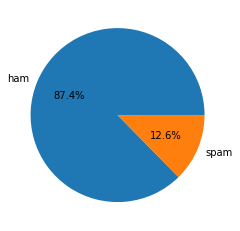

In [ ]:
# Pie graph of ham and spam messages
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.show()

In [ ]:
# Find number of characters in each message
df['length'] = df['message'].apply(len)
# Find number of words in each message
df['word_count'] = df['message'].apply(lambda x: len(str(x).split(" ")))
# Find number of sentences in each message
df['sentence_count'] = df['message'].apply(lambda x: len(str(x).split(".")))

In [ ]:
# Describe the word_count, sentence_count, special_char_count for ham
df[df['target']==0][['word_count', 'sentence_count']].describe()

,word_count,sentence_count
count,4516.000000,4516.000000
mean,14.259743,2.916519
std,11.231781,2.638732
min,1.000000,1.000000
25%,7.000000,1.000000
50%,11.000000,2.000000
75%,19.000000,4.000000
max,171.000000,42.000000


In [ ]:
# Describe the word_count, sentence_count, special_char_count for spam
df[df['target']==1][['word_count', 'sentence_count']].describe()

# You can see that spam char and words and sentences counts are alot higher than ham messages

,word_count,sentence_count
count,653.000000,653.000000
mean,23.728943,3.055130
std,5.985799,1.725848
min,2.000000,1.000000
25%,22.000000,2.000000
50%,25.000000,3.000000
75%,28.000000,4.000000
max,35.000000,14.000000


##Preprocessing Data
1. LowerCase
2. Tokenization (splitting up a larger body of text into smaller lines, words)
3. Removing Special Characters(EX: stop,the,is,to)
4. Remove Punctuations and stop words
5. Stemming Remove similar sounding words (Ex: speaking, spoke to just Speak)


In [ ]:
# Lowercase the dataset
df['message'] = df['message'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['message'].head(10)

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
5    freemsg hey there darling it's been 3 week's n...
6    even my brother is not like to speak with me. ...
7    as per your request 'melle melle (oru minnamin...
8    winner!! as a valued network customer you have...
9    had your mobile 11 months or more? u r entitle...
Name: message, dtype: object

In [ ]:
# Tokenize the dataset
nltk.download('punkt')

df['message'] = df['message'].apply(word_tokenize)
df['message'].head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0    [go, until, jurong, point, ,, crazy, .., avail...
1             [ok, lar, ..., joking, wif, u, oni, ...]
2    [free, entry, in, 2, a, wkly, comp, to, win, f...
3    [u, dun, say, so, early, hor, ..., u, c, alrea...
4    [nah, i, do, n't, think, he, goes, to, usf, ,,...
5    [freemsg, hey, there, darling, it, 's, been, 3...
6    [even, my, brother, is, not, like, to, speak, ...
7    [as, per, your, request, 'melle, melle, (, oru...
8    [winner, !, !, as, a, valued, network, custome...
9    [had, your, mobile, 11, months, or, more, ?, u...
Name: message, dtype: object

In [ ]:
# Remove special characters
df['message'] = df['message'].apply(lambda x: [word for word in x if word.isalpha()])
df['message'].head(10)

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, a, wkly, comp, to, win, fa, ...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, do, think, he, goes, to, usf, he, liv...
5    [freemsg, hey, there, darling, it, been, week,...
6    [even, my, brother, is, not, like, to, speak, ...
7    [as, per, your, request, melle, oru, minnaminu...
8    [winner, as, a, valued, network, customer, you...
9    [had, your, mobile, months, or, more, u, r, en...
Name: message, dtype: object

In [ ]:
# Remove Punctuations and stop words
nltk.download('stopwords')
stop = stopwords.words('english')

df['message'] = df['message'].apply(lambda x: [word for word in x if word not in stop])
df['message'].head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3        [u, dun, say, early, hor, u, c, already, say]
4       [nah, think, goes, usf, lives, around, though]
5    [freemsg, hey, darling, week, word, back, like...
6    [even, brother, like, speak, treat, like, aids...
7    [per, request, melle, oru, minnaminunginte, nu...
8    [winner, valued, network, customer, selected, ...
9    [mobile, months, u, r, entitled, update, lates...
Name: message, dtype: object

In [ ]:
#stemming .... Remove similar sounding words (Ex: speaking, spoke to just Speak)
st = PorterStemmer()
df['message'] = df['message'].apply(lambda x: [st.stem(word) for word in x])
df['message'].head(10)

0    [go, jurong, point, crazi, avail, bugi, n, gre...
1                         [ok, lar, joke, wif, u, oni]
2    [free, entri, wkli, comp, win, fa, cup, final,...
3        [u, dun, say, earli, hor, u, c, alreadi, say]
4         [nah, think, goe, usf, live, around, though]
5    [freemsg, hey, darl, week, word, back, like, f...
6    [even, brother, like, speak, treat, like, aid,...
7    [per, request, mell, oru, minnaminungint, nuru...
8    [winner, valu, network, custom, select, receiv...
9    [mobil, month, u, r, entitl, updat, latest, co...
Name: message, dtype: object

In [ ]:
# Get rid of bracket []
df['message'] = df['message'].apply(lambda x: ' '.join(x))
df['message'].head(10)

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri wkli comp win fa cup final tkt may ...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
5    freemsg hey darl week word back like fun still...
6        even brother like speak treat like aid patent
7    per request mell oru minnaminungint nurungu ve...
8    winner valu network custom select receivea pri...
9    mobil month u r entitl updat latest colour mob...
Name: message, dtype: object

In [ ]:
df.head()

,target,message,length,word_count,sentence_count
0,0,go jurong point crazi avail bugi n great world...,111,20,9
1,0,ok lar joke wif u oni,29,6,7
2,1,free entri wkli comp win fa cup final tkt may ...,155,28,2
3,0,u dun say earli hor u c alreadi say,49,11,7
4,0,nah think goe usf live around though,61,13,1


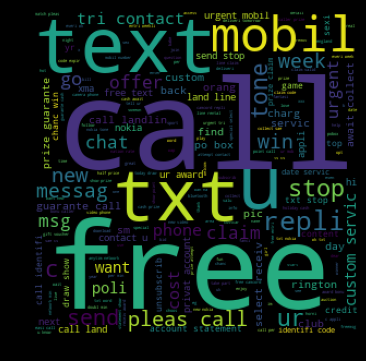

In [ ]:
# Create wordcloud for spam messages
spam_words = ' '.join(list(df[df['target']==1]['message']))
spam_wc = WordCloud(width=300, height=300).generate(spam_words)
plt.figure(figsize=(6,6), facecolor='black')
plt.imshow(spam_wc)

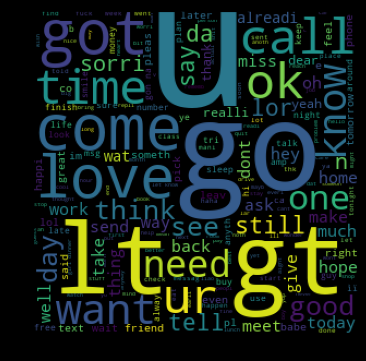

In [ ]:
#wordcloud for ham messages
ham_words = ' '.join(list(df[df['target']==0]['message']))
ham_wc = WordCloud(width=300,height=300).generate(ham_words)
plt.figure(figsize=(6,6),facecolor='black')
plt.imshow(ham_wc)

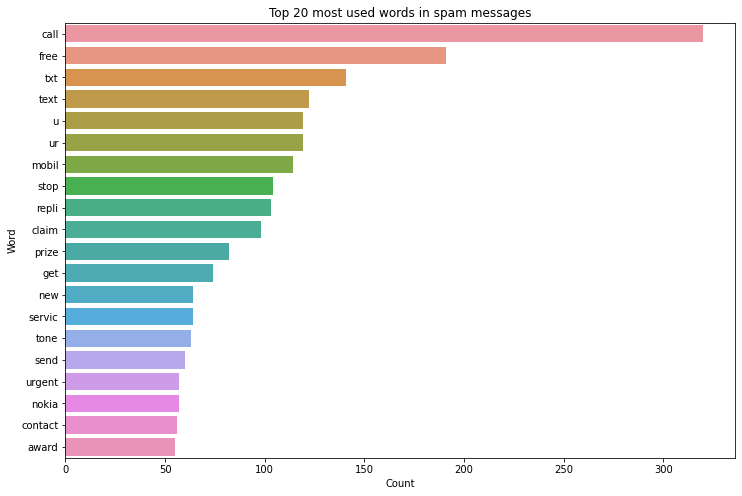

In [ ]:
# Top 20 most used words in spam messages as a bar graph
spam_words = ' '.join(list(df[df['target']==1]['message']))
spam_words = [word for word in spam_words.split()]
spam_words = pd.Series(spam_words).value_counts()[:20]

plt.figure(figsize=(12,8))
sns.barplot(x=spam_words, y=spam_words.index)
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 20 most used words in spam messages')
plt.show()

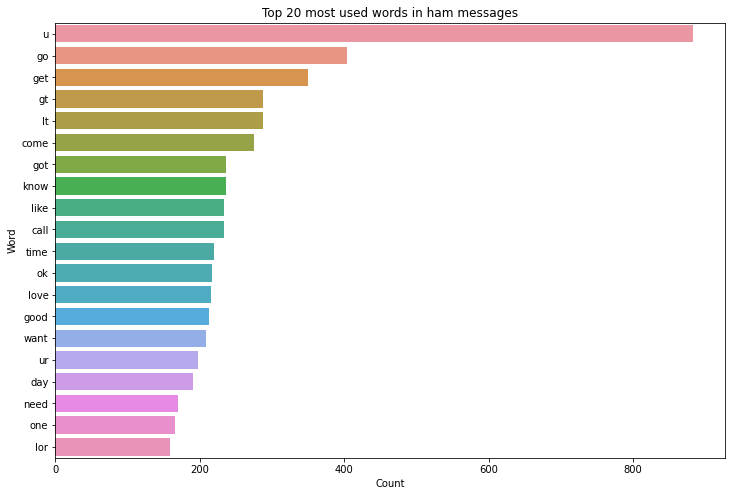

In [ ]:
# Top 20 most used words in ham messages as a bar graph
ham_words = ' '.join(list(df[df['target']==0]['message']))
ham_words = [word for word in ham_words.split()]
ham_words = pd.Series(ham_words).value_counts()[:20]

plt.figure(figsize=(12,8))
sns.barplot(x=ham_words, y=ham_words.index)
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 20 most used words in ham messages')
plt.show()

##Count Vectorizer Algorithm

In [ ]:
# Converting text into vectors 
cv = CountVectorizer(input='message', encoding='utf-8', lowercase=True, stop_words='english', 
                     ngram_range=(1,2), max_features=5000, analyzer='word', max_df=0.8, min_df=2, 
                     binary=True) 
X = cv.fit_transform(df['message']).toarray()
y = df['target'].values

In [ ]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
# Train the data
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size = 0.2,
    random_state = 32
)

# we did test using 30% test size and really had little to no change in the accuracy

In [ ]:
# Train the model using MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
                            
print(f"Accuracy:{100 * accuracy: .3f}%")
print(f"Precision:{100 * precision: .3f}%")
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 98.646%
Precision: 96.262%
Confusion matrix:
 [[917   4]
 [ 10 103]]


In [ ]:
# Predict a single message
message ="Congratulations you won... Click this link http:/1231 to claim your prize"
message = cv.transform([message]).toarray()
model.predict(message)

array([1])

MultinomialNB have a better performance compared to Decision Tree Classifier

In [ ]:
# Train the model using Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
                            
print(f"Accuracy:{100 * accuracy: .3f}%")
print(f"Precision:{100 * precision: .3f}%")
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 95.841%
Precision: 81.250%
Confusion matrix:
 [[900  21]
 [ 22  91]]


In [ ]:
# Predict a single message
message ="Congratulations you won... Click this link http:/1231 to claim your prize"
message = cv.transform([message]).toarray()
dtc.predict(message)

array([1])

##Tfidf Vectorizer algorithm

In [ ]:
tfidf = TfidfVectorizer(min_df=5, max_df=0.5, max_features=10000, ngram_range=(1, 3))
X = tfidf.fit_transform(df['message'])
y = df['target'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size = 0.2,
    random_state = 32
)

In [ ]:
model2 = MultinomialNB()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
                            
print(f"Accuracy:{100 * accuracy: .3f}%")
print(f"Precision:{100 * precision: .3f}%")
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 98.162%
Precision: 100.000%
Confusion matrix:
 [[921   0]
 [ 19  94]]


In [ ]:
# Predict a single message
message ="Congratulations you won... Click this link http:/1231 to claim your prize"
message = tfidf.transform([message]).toarray()
model2.predict(message)

array([1])

MultinomialNB have a better performance compared to Decision Tree Classifier

In [ ]:
dtc2 = DecisionTreeClassifier()
dtc2.fit(X_train, y_train)

y_pred = dtc2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
                            
print(f"Accuracy:{100 * accuracy: .3f}%")
print(f"Precision:{100 * precision: .3f}%")
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 95.068%
Precision: 75.833%
Confusion matrix:
 [[892  29]
 [ 22  91]]


In [ ]:
# Predict a single message
message ="Congratulations you won... Click this link http:/1231 to claim your prize"
message = tfidf.transform([message]).toarray()
dtc2.predict(message)

array([1])

#Testing a different dataset

In [ ]:
!wget 'https://raw.githubusercontent.com/adrawnangel/AIprojectfinal/main/spam_ham_dataset.csv'

--2022-12-17 00:37:12--  https://raw.githubusercontent.com/adrawnangel/AIprojectfinal/main/spam_ham_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5502589 (5.2M) [text/plain]
Saving to: ‘spam_ham_dataset.csv’

spam_ham_dataset.cs 100%[===================>]   5.25M  --.-KB/s    in 0.06s   

2022-12-17 00:37:12 (92.4 MB/s) - ‘spam_ham_dataset.csv’ saved [5502589/5502589]



In [ ]:
df2 = pd.read_csv('/content/spam_ham_dataset.csv', encoding="ISO-8859-1")

##Cleaning Up The Data

In [ ]:
df2.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df2.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [ ]:
df2.drop(df2.columns[[0, 3]], axis=1, inplace=True)
df2.rename(columns = {'label': 'target', 'text':'message'}, inplace = True)

In [ ]:
df2.head(10)

,target,message
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
5,ham,Subject: ehronline web address change\r\nthis ...
6,ham,Subject: spring savings certificate - take 30 ...
7,spam,Subject: looking for medication ? we ` re the ...
8,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...
9,ham,"Subject: nominations for oct . 21 - 23 , 2000\..."


In [ ]:
df2.isna().sum()

target     0
message    0
dtype: int64

In [ ]:
df2.dropna(inplace=True)
df2.isnull().sum()

target     0
message    0
dtype: int64

In [ ]:
df2.duplicated().sum()

178

In [ ]:
df2 = df2.drop_duplicates(keep = "first")
df2.duplicated().sum()

0

In [ ]:
# Count number of ham and spam
df2['target'].value_counts()

ham     3531
spam    1462
Name: target, dtype: int64

In [ ]:
# Converting ham and spam into numeric: 0 is ham, 1 is spam
#le comes from LabelEncoder, that was already imported in the first dataset
df2['target'] = le.fit_transform(df2['target'])
df2.head(10)

<ipython-input-55-9006c833f003>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['target'] = le.fit_transform(df2['target'])


,target,message
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...
5,0,Subject: ehronline web address change\r\nthis ...
6,0,Subject: spring savings certificate - take 30 ...
7,1,Subject: looking for medication ? we ` re the ...
8,0,Subject: noms / actual flow for 2 / 26\r\nwe a...
9,0,"Subject: nominations for oct . 21 - 23 , 2000\..."


## EDA

In [ ]:
print('0:Ham \n1:Spam')
df2['target'].value_counts()

0:Ham 
1:Spam


0    3531
1    1462
Name: target, dtype: int64

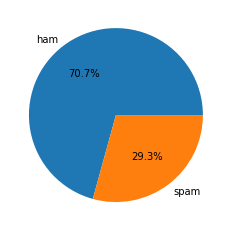

In [ ]:
# Pie graph of ham and spam messages
import matplotlib.pyplot as plt

plt.pie(df2['target'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.show()

In [ ]:
# Find number of characters in each message
df2['length'] = df2['message'].apply(len)
# Find number of words in each message
df2['word_count'] = df2['message'].apply(lambda x: len(str(x).split(" ")))
# Find number of sentences in each message
df2['sentence_count'] = df2['message'].apply(lambda x: len(str(x).split(".")))

<ipython-input-58-9b7993081553>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['length'] = df2['message'].apply(len)
<ipython-input-58-9b7993081553>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['word_count'] = df2['message'].apply(lambda x: len(str(x).split(" ")))
<ipython-input-58-9b7993081553>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [ ]:
# Describe the word_count, sentence_count for ham
df2[df2['target']==0][['word_count', 'sentence_count']].describe()

,word_count,sentence_count
count,3531.000000,3531.000000
mean,211.662702,10.789578
std,314.371231,24.096799
min,2.000000,1.000000
25%,47.000000,4.000000
50%,117.000000,6.000000
75%,275.000000,12.000000
max,8464.000000,1202.000000


In [ ]:
# Describe the word_count, sentence_count for spam
df2[df2['target']==1][['word_count', 'sentence_count']].describe()

,word_count,sentence_count
count,1462.000000,1462.000000
mean,218.530780,14.263338
std,322.216328,21.730469
min,2.000000,1.000000
25%,52.000000,3.000000
50%,106.500000,7.000000
75%,227.250000,16.000000
max,3707.000000,250.000000


##Preprocessing Data
1. LowerCase
2. Tokenization (splitting up a larger body of text into smaller lines, words)
3. Removing Special Characters(EX: stop,the,is,to)
4. Remove Punctuations and stop words
5. Stemming Remove similar sounding words (Ex: speaking, spoke to just Speak)


In [ ]:
# Lowercase the dataset
df2['message'] = df2['message'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2['message'].head(10)

0    subject: enron methanol ; meter # : 988291 thi...
1    subject: hpl nom for january 9 , 2001 ( see at...
2    subject: neon retreat ho ho ho , we ' re aroun...
3    subject: photoshop , windows , office . cheap ...
4    subject: re : indian springs this deal is to b...
5    subject: ehronline web address change this mes...
6    subject: spring savings certificate - take 30 ...
7    subject: looking for medication ? we ` re the ...
8    subject: noms / actual flow for 2 / 26 we agre...
9    subject: nominations for oct . 21 - 23 , 2000 ...
Name: message, dtype: object

In [ ]:
# Tokenize the dataset
nltk.download('punkt')

df2['message'] = df2['message'].apply(word_tokenize)
df2['message'].head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [subject, :, enron, methanol, ;, meter, #, :, ...
1    [subject, :, hpl, nom, for, january, 9, ,, 200...
2    [subject, :, neon, retreat, ho, ho, ho, ,, we,...
3    [subject, :, photoshop, ,, windows, ,, office,...
4    [subject, :, re, :, indian, springs, this, dea...
5    [subject, :, ehronline, web, address, change, ...
6    [subject, :, spring, savings, certificate, -, ...
7    [subject, :, looking, for, medication, ?, we, ...
8    [subject, :, noms, /, actual, flow, for, 2, /,...
9    [subject, :, nominations, for, oct, ., 21, -, ...
Name: message, dtype: object

In [ ]:
# Remove special characters
df2['message'] = df2['message'].apply(lambda x: [word for word in x if word.isalpha()])
df2['message'].head(10)

0    [subject, enron, methanol, meter, this, is, a,...
1    [subject, hpl, nom, for, january, see, attache...
2    [subject, neon, retreat, ho, ho, ho, we, re, a...
3    [subject, photoshop, windows, office, cheap, m...
4    [subject, re, indian, springs, this, deal, is,...
5    [subject, ehronline, web, address, change, thi...
6    [subject, spring, savings, certificate, take, ...
7    [subject, looking, for, medication, we, re, th...
8    [subject, noms, actual, flow, for, we, agree, ...
9    [subject, nominations, for, oct, see, attached...
Name: message, dtype: object

In [ ]:
# Remove Punctuations and stop words
nltk.download('stopwords')
stop = stopwords.words('english')
stop.append('subject')

df2['message'] = df2['message'].apply(lambda x: [word for word in x if word not in stop])
df2['message'].head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [enron, methanol, meter, follow, note, gave, m...
1    [hpl, nom, january, see, attached, file, hplno...
2    [neon, retreat, ho, ho, ho, around, wonderful,...
3    [photoshop, windows, office, cheap, main, tren...
4    [indian, springs, deal, book, teco, pvr, reven...
5    [ehronline, web, address, change, message, int...
6    [spring, savings, certificate, take, save, use...
7    [looking, medication, best, source, difficult,...
8    [noms, actual, flow, agree, forwarded, melissa...
9    [nominations, oct, see, attached, file, hplnl,...
Name: message, dtype: object

In [ ]:
# stemming .... Remove similar sounding words (Ex: speaking, spoke to just Speak)
df2['message'] = df2['message'].apply(lambda x: [st.stem(word) for word in x])
df2['message'].head(10)

0    [enron, methanol, meter, follow, note, gave, m...
1    [hpl, nom, januari, see, attach, file, hplnol,...
2    [neon, retreat, ho, ho, ho, around, wonder, ti...
3    [photoshop, window, offic, cheap, main, trend,...
4    [indian, spring, deal, book, teco, pvr, revenu...
5    [ehronlin, web, address, chang, messag, intend...
6    [spring, save, certif, take, save, use, custom...
7    [look, medic, best, sourc, difficult, make, ma...
8    [nom, actual, flow, agre, forward, melissa, jo...
9    [nomin, oct, see, attach, file, hplnl, xl, hpl...
Name: message, dtype: object

In [ ]:
# Get rid of bracket []
df2['message'] = df2['message'].apply(lambda x: ' '.join(x))
df2['message'].head(10)

0    enron methanol meter follow note gave monday p...
1    hpl nom januari see attach file hplnol xl hpln...
2    neon retreat ho ho ho around wonder time year ...
3    photoshop window offic cheap main trend abas d...
4    indian spring deal book teco pvr revenu unders...
5    ehronlin web address chang messag intend ehron...
6    spring save certif take save use custom apprec...
7    look medic best sourc difficult make materi co...
8    nom actual flow agre forward melissa jone texa...
9          nomin oct see attach file hplnl xl hplnl xl
Name: message, dtype: object

In [ ]:
df2.head()

,target,message,length,word_count,sentence_count
0,0,enron methanol meter follow note gave monday p...,327,62,4
1,0,hpl nom januari see attach file hplnol xl hpln...,97,21,3
2,0,neon retreat ho ho ho around wonder time year ...,2524,541,20
3,1,photoshop window offic cheap main trend abas d...,414,39,3
4,0,indian spring deal book teco pvr revenu unders...,336,66,4


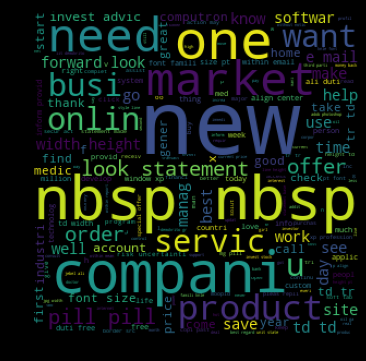

In [ ]:
# Create wordcloud for spam messages
spam_words2 = ' '.join(list(df2[df2['target']==1]['message']))
spam_wc2 = WordCloud(width=300, height=300).generate(spam_words2)
plt.figure(figsize=(6,6), facecolor='black')
plt.imshow(spam_wc2)

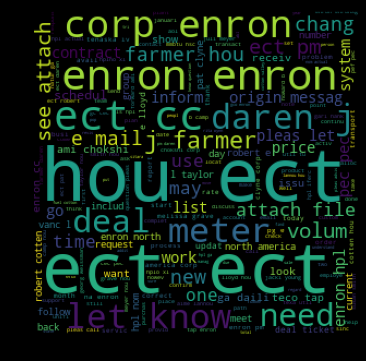

In [ ]:
# wordcloud for ham messages
ham_words2 = ' '.join(list(df2[df2['target']==0]['message']))
ham_wc2 = WordCloud(width=300,height=300).generate(ham_words2)
plt.figure(figsize=(6,6),facecolor='black')
plt.imshow(ham_wc2)

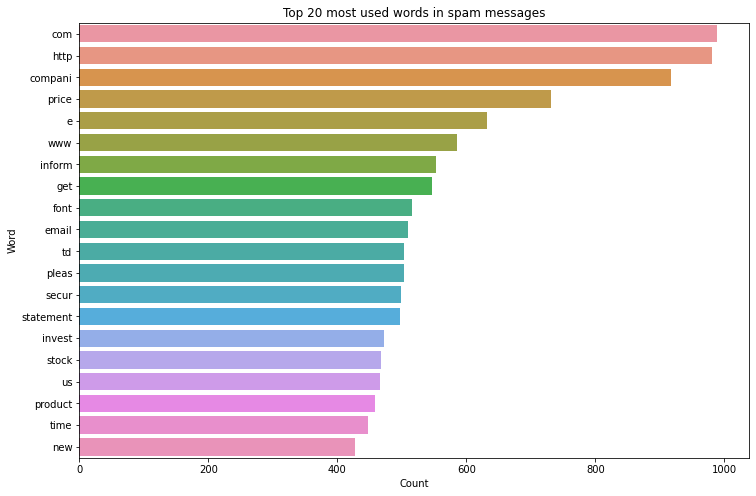

In [ ]:
# Top 20 most used words in spam messages as a bar graph
spam_words2 = ' '.join(list(df2[df2['target']==1]['message']))
spam_words2 = [word for word in spam_words2.split()]
spam_words2 = pd.Series(spam_words2).value_counts()[:20]

plt.figure(figsize=(12,8))
sns.barplot(x=spam_words2, y=spam_words2.index)
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 20 most used words in spam messages')
plt.show()

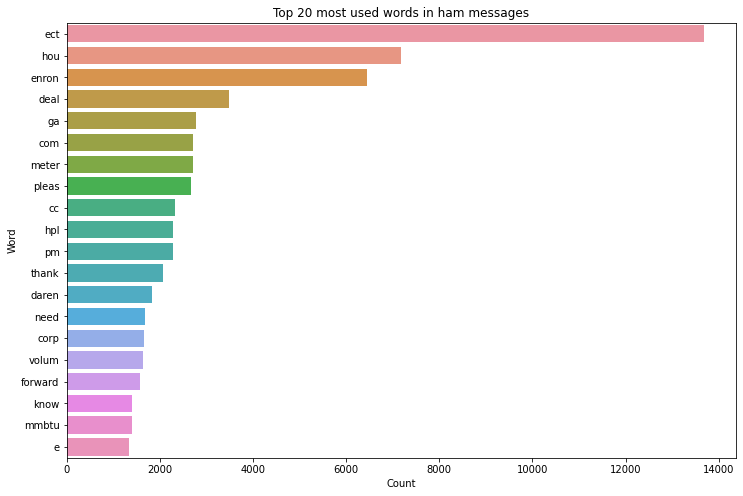

In [ ]:
# Top 20 most used words in ham messages as a bar graph
ham_words2 = ' '.join(list(df2[df2['target']==0]['message']))
ham_words2 = [word for word in ham_words2.split()]
ham_words2 = pd.Series(ham_words2).value_counts()[:20]

plt.figure(figsize=(12,8))
sns.barplot(x=ham_words2, y=ham_words2.index)
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 20 most used words in ham messages')
plt.show()

##Count Vectorizer Algorithm

In [ ]:
cv2 = CountVectorizer(input='message', encoding='utf-8', lowercase=True, stop_words='english', 
                     ngram_range=(1,2), max_features=5000, analyzer='word', max_df=0.8, min_df=2, 
                     binary=True)

X = cv2.fit_transform(df2['message']).toarray()
y = df2['target'].values

In [ ]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
# Trainning the data

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size = 0.2,
    random_state = 32
)

In [ ]:
# Train the model using MultinomialNB
model3 = MultinomialNB()

model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
                            
print(f"Accuracy:{100 * accuracy: .3f}%")
print(f"Precision:{100 * precision: .3f}%")
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 94.695%
Precision: 86.930%
Confusion matrix:
 [[660  43]
 [ 10 286]]


In [ ]:
# Predict a single message
message ="Congratulations you won... Click this link http:/1231 to claim your prize"
message = cv2.transform([message]).toarray()
model3.predict(message)

array([1])

In [ ]:
# Train the model using Decision Tree Classifier
dtc3 = DecisionTreeClassifier()

dtc3.fit(X_train, y_train)

y_pred = dtc3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
                            
print(f"Accuracy:{100 * accuracy: .3f}%")
print(f"Precision:{100 * precision: .3f}%")
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 94.194%
Precision: 88.889%
Confusion matrix:
 [[669  34]
 [ 24 272]]


In [ ]:
# Predict a single message
message ="Congratulations you won... Click this link http:/1231 to claim your prize"
message = cv2.transform([message]).toarray()
dtc3.predict(message)

array([1])

##Tfidf Vectorizer algorithm

In [ ]:
tfidf2 = TfidfVectorizer(min_df=5, max_df=0.5, max_features=10000, ngram_range=(1, 3))
X = tfidf2.fit_transform(df2['message'])
y = df2['target'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size = 0.2,
    random_state = 32
)

In [ ]:
# Train the model using MultinomialNB
model4 = MultinomialNB()
model4.fit(X_train, y_train)

y_pred2 = model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
                            
print(f"Accuracy:{100 * accuracy: .3f}%")
print(f"Precision:{100 * precision: .3f}%")
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred2))

Accuracy: 95.896%
Precision: 90.221%
Confusion matrix:
 [[672  31]
 [ 10 286]]


In [ ]:
# Predict a single message
message ="Congratulations you won... Click this link http:/1231 to claim your prize"
message = tfidf2.transform([message]).toarray()
model4.predict(message)

array([1])

In [ ]:
# Train the model using Decision Tree Classifier
dtc4 = DecisionTreeClassifier()
dtc4.fit(X_train, y_train)

y_pred2 = dtc4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
                            
print(f"Accuracy:{100 * accuracy: .3f}%")
print(f"Precision:{100 * precision: .3f}%")
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred2))

Accuracy: 94.294%
Precision: 89.967%
Confusion matrix:
 [[673  30]
 [ 27 269]]


In [ ]:
# Predict a single message
message ="Congratulations you won... Click this link http:/1231 to claim your prize"
message = tfidf2.transform([message]).toarray()
dtc4.predict(message)

array([1])